In [40]:
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, average_precision_score, PrecisionRecallDisplay

%matplotlib inline 

# Main

In [37]:
num_cv = 10 
result_file = '/Users/wangheehwan/Desktop/kidney_radiomics/pipeline/result/main/0.2PC_xgboost_c9f0a4.json'

with open(result_file, 'rb') as f: 
    result = json.load(f)

train_y = np.array(result['train_y']).squeeze(-1).astype(np.int64)
train_proba = np.array(result['train_proba'])[:,:,1]
test_y = np.array(result['test_y']).squeeze(-1).astype(np.int64)
pred_proba = np.array(result['pred_proba'])[:,:,1]


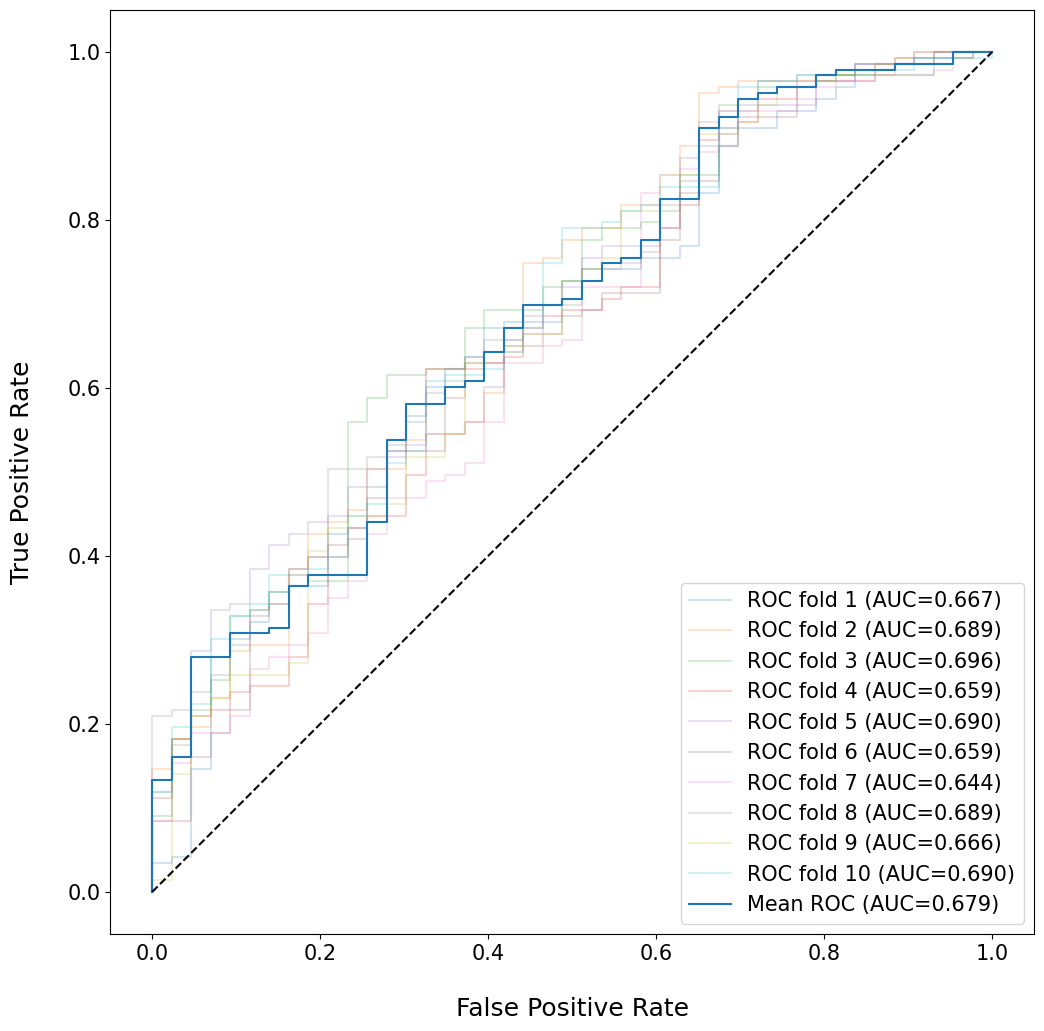

In [38]:
plt.figure(figsize=(18, 12))
ax = plt.gca()
auc_summary = []
for fold in range(num_cv): 
    pred_proba_tmp = pred_proba[fold, :]
    fpr_tmp, tpr_tmp, _ = roc_curve(test_y, pred_proba_tmp)
    roc_auc_tmp = auc(fpr_tmp, tpr_tmp)
    auc_summary.append('ROC fold {} (AUC={:.3f})'.format(fold+1, roc_auc_tmp))
    RocCurveDisplay(fpr=fpr_tmp, tpr=tpr_tmp, roc_auc=roc_auc_tmp).plot(ax=ax, alpha=0.2)

pred_proba_mean = np.mean(pred_proba, axis=0)
fpr_mean, tpr_mean, _ = roc_curve(test_y, pred_proba_mean)
roc_auc_mean = auc(fpr_mean, tpr_mean)
auc_summary.append('Mean ROC (AUC={:.3f})'.format(roc_auc_mean))
RocCurveDisplay(fpr=fpr_mean, tpr=tpr_mean, roc_auc=roc_auc_mean).plot(ax=ax, alpha=1)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("\nFalse Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate\n", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("ROC curves of malignant kidney cancer detection\n", fontsize=25)
plt.legend(auc_summary, loc='lower right', fontsize=15)
plt.show()

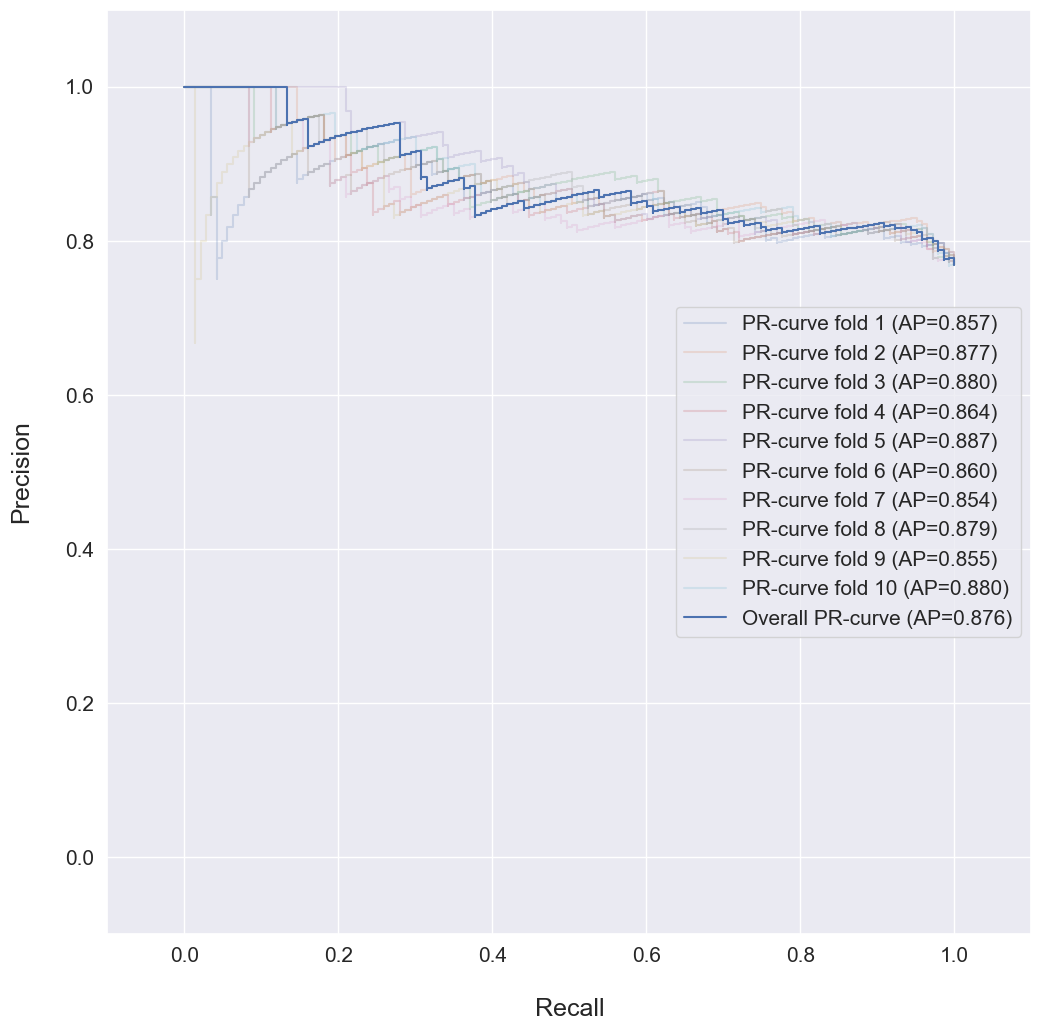

In [203]:
plt.figure(figsize=(18, 12))
ax = plt.gca()
ap_summary = []
for fold in range(num_cv): 
    pred_proba_tmp = pred_proba[fold, :]
    precision_tmp, recall_tmp, _ = precision_recall_curve(test_y, pred_proba_tmp)
    ap_tmp = average_precision_score(test_y, pred_proba_tmp)
    PrecisionRecallDisplay(precision=precision_tmp, recall=recall_tmp).plot(ax=ax, alpha=0.2)
    ap_summary.append('PR-curve fold {} (AP={:.3f})'.format(fold+1, ap_tmp))
    

pred_proba_mean = np.mean(pred_proba, axis=0)
precision_mean, recall_mean, _ = precision_recall_curve(test_y, pred_proba_mean)
ap_mean = average_precision_score(test_y, pred_proba_mean)
ap_summary.append('Overall PR-curve (AP={:.3f})'.format(ap_mean))
PrecisionRecallDisplay(precision=precision_mean, recall=recall_mean).plot(ax=ax, alpha=1)

plt.axis("square")
#plt.plot([1, 0], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("\nRecall", fontsize=18)
plt.ylabel("Precision\n", fontsize=18)
plt.xlim(left=-0.1, right=1.1)
plt.ylim(bottom=-0.1, top=1.1)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title("PR curves of malignant kidney cancer detection\n", fontsize=25)
plt.legend(ap_summary,loc='center right', fontsize=15)
plt.show()

## Supplementary 


### ratio of PC 
metric = validation Accuracy

([<matplotlib.axis.XTick at 0x155a2d6f0>,
 [Text(0, 0, '0.1'), Text(1, 0, '0.2'), Text(2, 0, '0.3')])

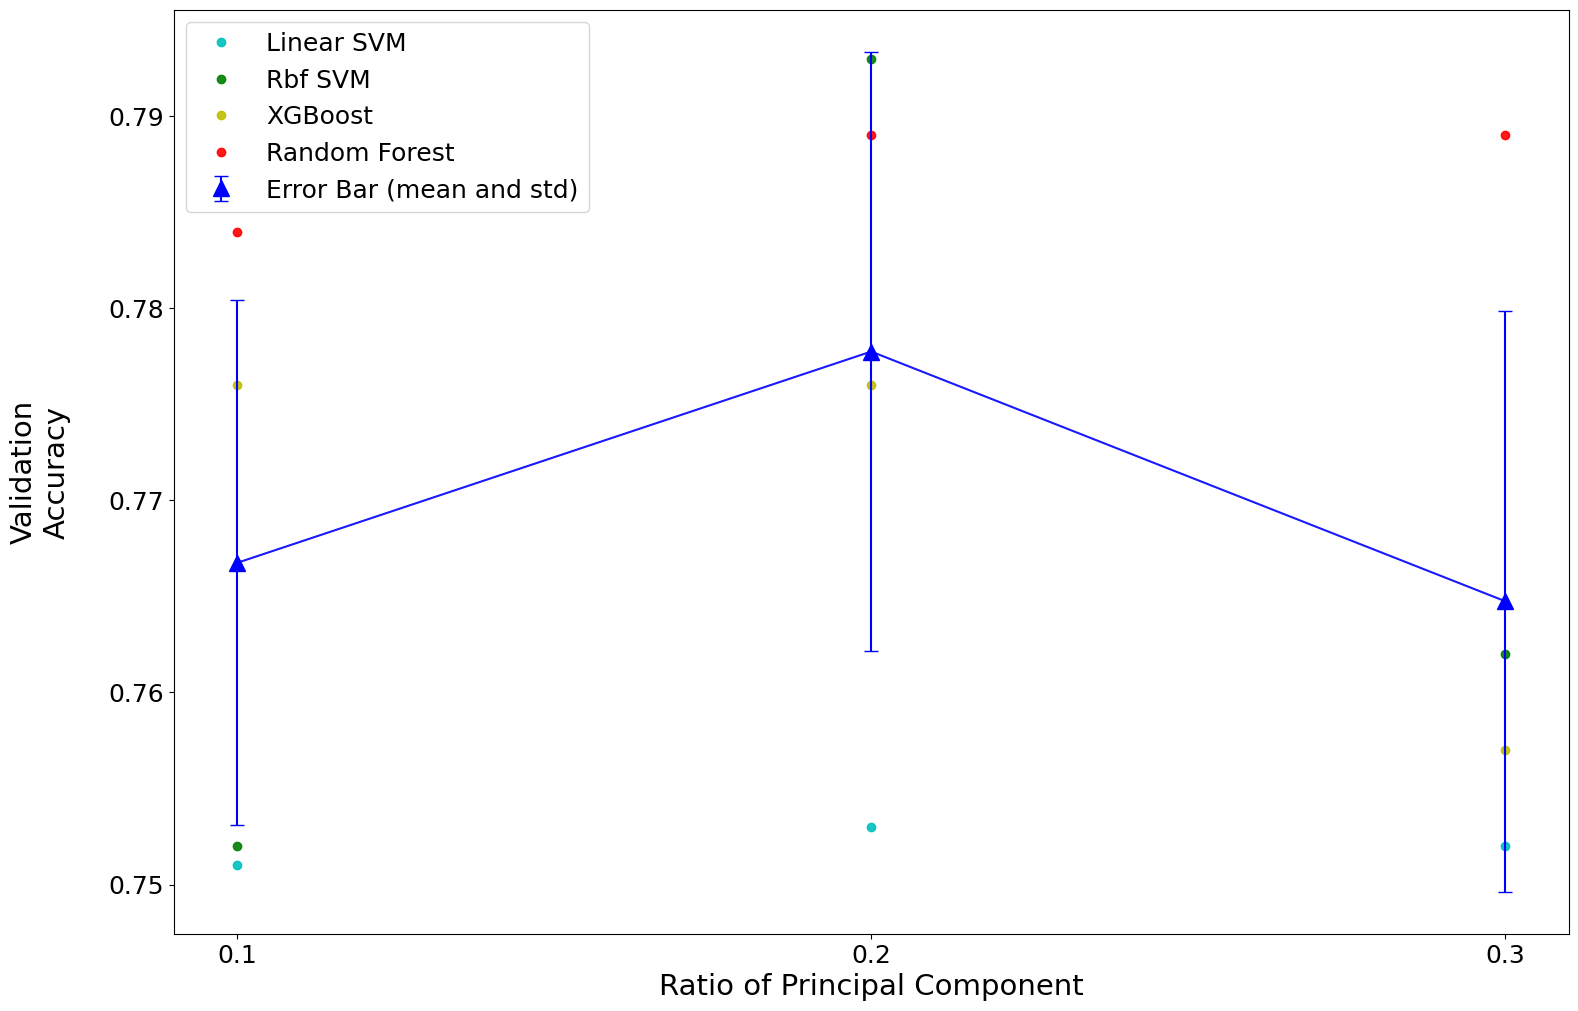

In [67]:
#PC_01 = {'Linear SVM':, 'Rbf SVM': 0.752, 'XGBoost': ,'Random Forest':0.776}
PC_01 = {'Linear SVM':0.751, 'Rbf SVM': 0.756,'XGBoost':0.784, 'Random Forest':0.776}
#PC_02 = {'Linear SVM':, 'Rbf SVM': 0.793, 'XGBoost': ,'Random Forest':0.776}
PC_02 = {'Linear SVM':0.753, 'Rbf SVM': 0.793,'XGBoost':0.789, 'Random Forest':0.776}
#PC_03 = {'Linear SVM': , 'Rbf SVM': 0.762, 'XGBoost': ,'Random Forest':0.757}
PC_03 = {'Linear SVM':0.752, 'Rbf SVM': 0.752,'XGBoost':0.789,'Random Forest':0.766}

# basic setting 

plt.figure(figsize=(18, 12))
plt.yticks(fontsize=18)
#plt.ylim([0.65, 0.85])
plt.xlabel("Ratio of Principal Component", fontsize=21)
plt.ylabel("Validation\nAccuracy\n ", fontsize=21)


#plt.title("The relationship between accuracy in validation set and\nthe ratio of the number of principal components to radiomic features", fontsize=25)
# linear SVM 
plt.plot([0.751, 0.753, 0.752], 'co', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.3"], fontsize=18)

# Rbf SVM
plt.plot([0.752, 0.793, 0.762], 'go', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.3"], fontsize=18)

# Random Forest 
plt.plot([0.776, 0.776, 0.757], 'yo', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.3"], fontsize=18)

# XGBoost
plt.plot([0.784, 0.789, 0.789], 'ro', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.3"], fontsize=18)

# mean 
#plt.plot(ratio_list, [np.mean(list(PC_01.values())), np.mean(list(PC_02.values())), np.mean(list(PC_03.values()))], 'ro')
err = np.array([np.std(list(PC_01.values())), np.std(list(PC_02.values())), np.std(list(PC_03.values()))])
plt.errorbar(x = ["0.1", "0.2", "0.3"], y = [np.mean(list(PC_01.values())), np.mean(list(PC_02.values())), np.mean(list(PC_03.values()))], yerr=err,linestyle="None", fmt='b^', capsize=5, markersize=12)
plt.legend(['Linear SVM', 'Rbf SVM', 'XGBoost','Random Forest', 'Error Bar (mean and std)'], fontsize=18)
plt.plot([np.mean(list(PC_01.values())), np.mean(list(PC_02.values())), np.mean(list(PC_03.values()))], 'b-', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.3"], fontsize=18)


#plt.legend(['Rbf SVM', 'Random Forest', 'Mean'])


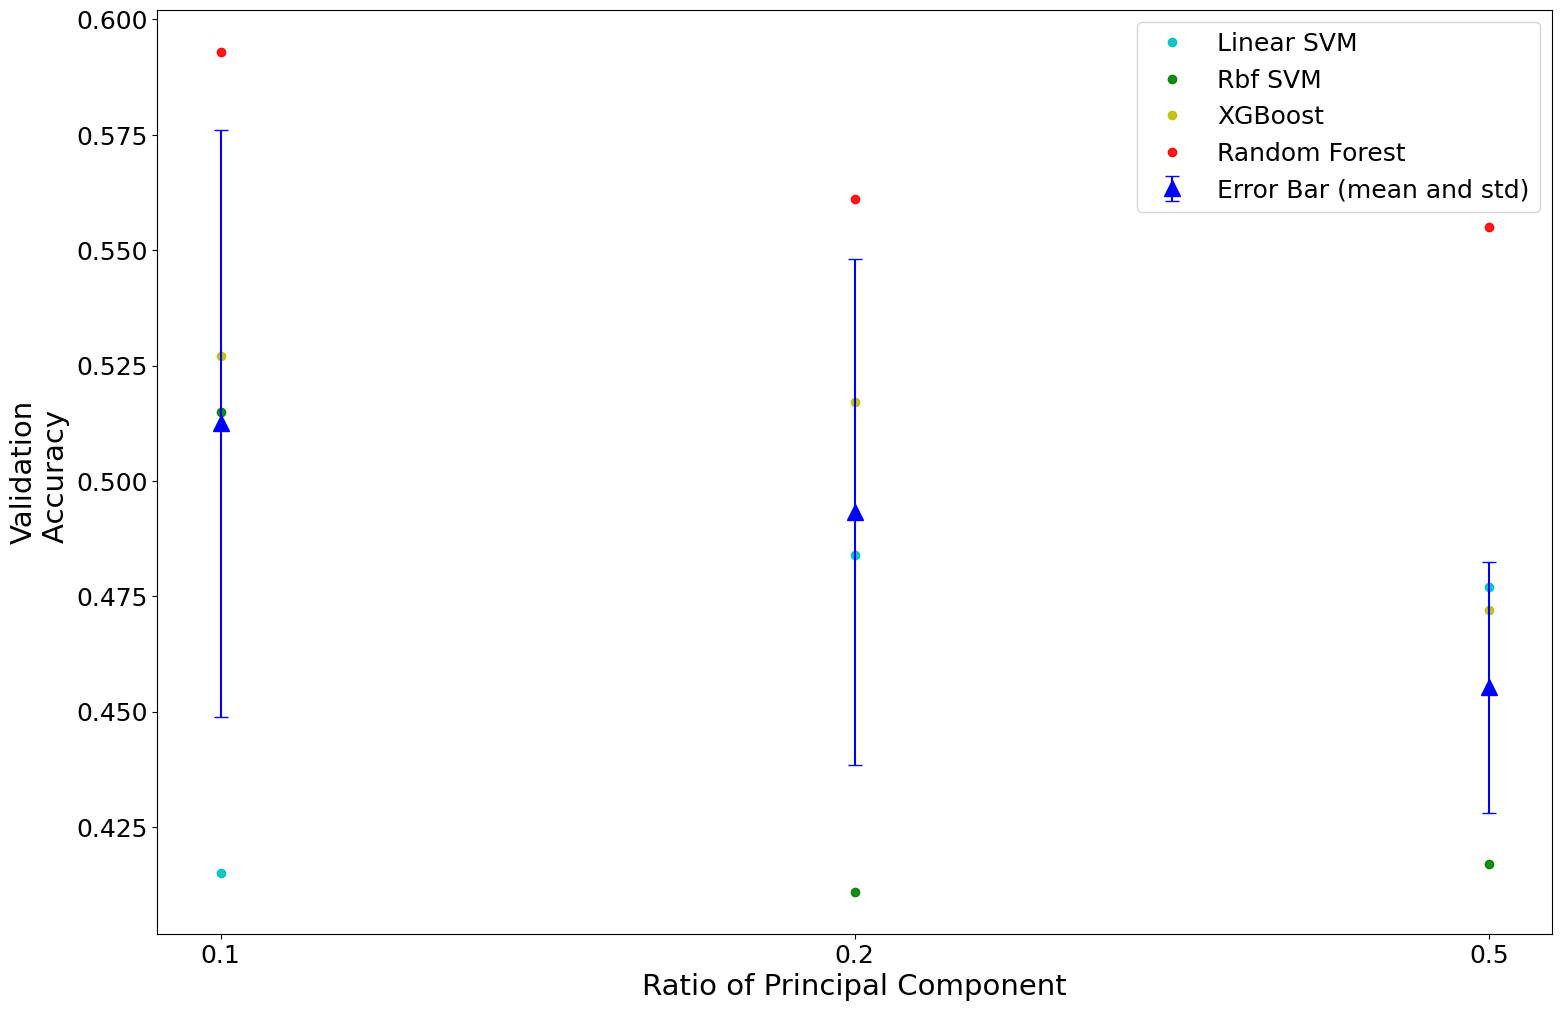

In [55]:

#PC_01 = {'Linear SVM':, 'Rbf SVM': 0.752, 'XGBoost': ,'Random Forest':0.776}
PC_01 = {'Linear SVM':0.415, 'Rbf SVM': 0.515,'XGBoost':0.593, 'Random Forest':0.527}
#PC_02 = {'Linear SVM':, 'Rbf SVM': 0.793, 'XGBoost': ,'Random Forest':0.776}
PC_02 = {'Linear SVM':0.484, 'Rbf SVM': 0.411,'XGBoost': 0.561,'Random Forest':0.517}
#PC_05 = {'Linear SVM': , 'Rbf SVM': 0.762, 'XGBoost': ,'Random Forest':0.757}
PC_05 = {'Linear SVM':0.477, 'Rbf SVM': 0.417,'Random Forest':0.472}

# basic setting 

plt.figure(figsize=(18, 12))
plt.yticks(fontsize=18)
plt.xlabel("Ratio of Principal Component", fontsize=21)
plt.ylabel("Validation\nAccuracy ", fontsize=21)

#plt.title("The relationship between accuracy in validation set and\nthe ratio of the number of principal components to radiomic features", fontsize=25)
# linear SVM 
plt.plot( [0.415, 0.484, 0.477], 'co', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.5"], fontsize=18)

# Rbf SVM
plt.plot([0.515, 0.411, 0.417], 'go', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.5"], fontsize=18)

# Random Forest 
plt.plot([0.527, 0.517, 0.472], 'yo', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.5"], fontsize=18)

# XGBoost
plt.plot([0.593, 0.561, 0.555], 'ro', alpha=0.9)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.5"], fontsize=18)

# mean 
#plt.plot(ratio_list, [np.mean(list(PC_01.values())), np.mean(list(PC_02.values())), np.mean(list(PC_05.values()))], 'ro')
err = np.array([np.std(list(PC_01.values())), np.std(list(PC_02.values())), np.std(list(PC_05.values()))])
plt.errorbar(x = ["0.1", "0.2", "0.5"], y = [np.mean(list(PC_01.values())), np.mean(list(PC_02.values())), np.mean(list(PC_05.values()))], yerr=err,linestyle="None", fmt='b^', capsize=5, markersize=12)
plt.xticks(np.arange(3), labels=["0.1", "0.2", "0.5"], fontsize=18)

plt.legend(['Linear SVM', 'Rbf SVM', 'XGBoost','Random Forest', 'Error Bar (mean and std)'], fontsize=18)
#plt.legend(['Rbf SVM', 'Random Forest', 'Mean'])


([<matplotlib.axis.XTick at 0x1521ac850>,
 [Text(0, 0, '0'), Text(1, 0, '0.1'), Text(2, 0, '0.2'), Text(3, 0, '0.5')])

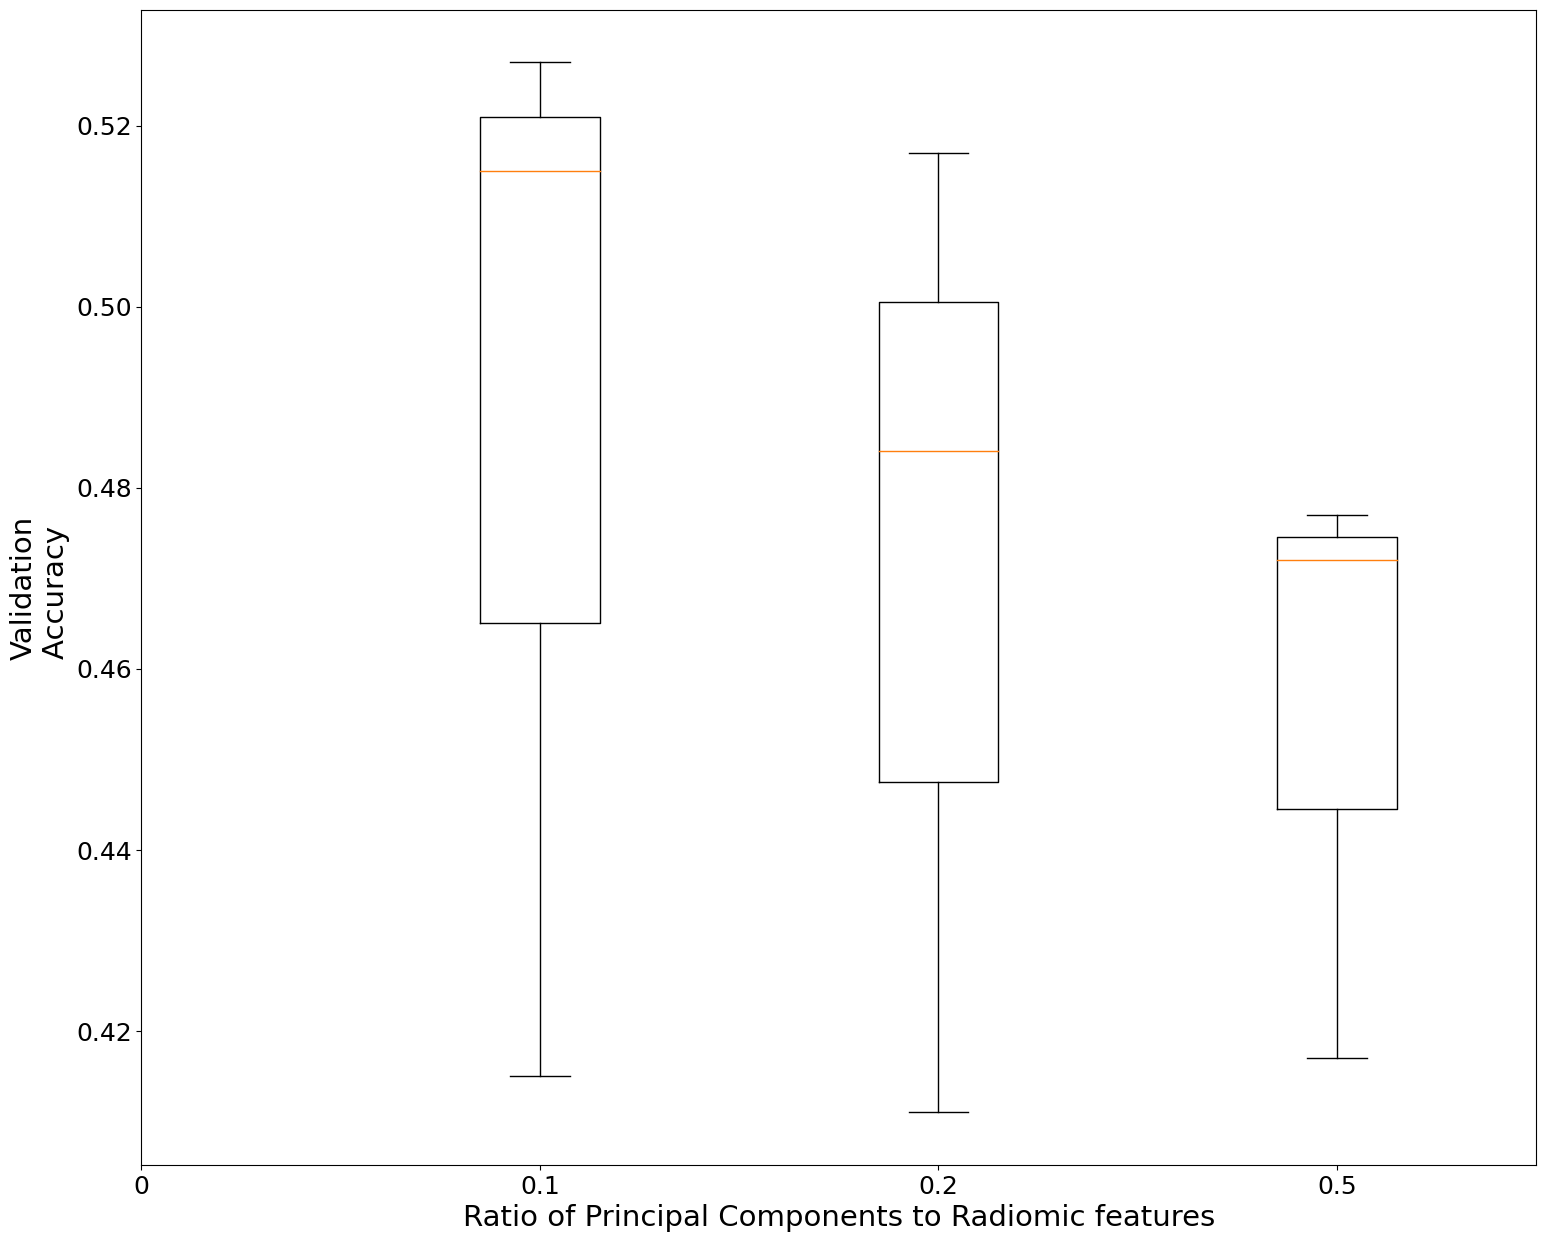

In [45]:
ratio_list = [0.1, 0.2, 0.5]

#PC_01 = {'Linear SVM':, 'Rbf SVM': 0.752, 'XGBoost': ,'Random Forest':0.776}
PC_01 = {'Linear SVM':0.415, 'Rbf SVM': 0.515,'Random Forest':0.527}
#PC_02 = {'Linear SVM':, 'Rbf SVM': 0.793, 'XGBoost': ,'Random Forest':0.776}
PC_02 = {'Linear SVM':0.484, 'Rbf SVM': 0.411,'Random Forest':0.517}
#PC_05 = {'Linear SVM': , 'Rbf SVM': 0.762, 'XGBoost': ,'Random Forest':0.757}
PC_05 = {'Linear SVM':0.477, 'Rbf SVM': 0.417,'Random Forest':0.472}

# basic settings
plt.figure(figsize=(18, 15))
plt.yticks(fontsize=18)
plt.xlabel("Ratio of Principal Components to Radiomic features", fontsize=21)
plt.ylabel("Validation\nAccuracy ", fontsize=21)
#plt.title("The relationship between accuracy in validation set and\nthe ratio of the number of principal components to radiomic features", fontsize=25)

# violin plot
plt.boxplot([list(PC_01.values()), list(PC_02.values()), list(PC_05.values())])
plt.xticks(np.arange(4), labels=["0","0.1", "0.2", "0.5"], fontsize=18)

### Confusion Matrix heatmap (Malignancy vs Benign)

In [216]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def get_pred(proba:np.ndarray): 
    pred = [] 
    for i in range(len(proba)): 
        pred.append(np.argmax(proba[i]).item())
    return pred


threshold = 0.8
result = '/Users/wangheehwan/Desktop/kidney_radiomics/pipeline/result/main/0.2PC_xgboost_c9f0a4.json'
with open(result) as f:
    file = json.load(f)

train_pred_diff_threshold = (np.array(file['mean_train_proba'])[:, 1] >= threshold).astype(int)
test_pred_diff_threshold = (np.array(file['mean_pred_proba'])[:, 1] >= threshold).astype(int)

name = ['Benign', 'Malignant']

train_cm_heatmap = pd.DataFrame(confusion_matrix(file['train_y'], train_pred_diff_threshold))
train_cm_heatmap.columns = name 
train_cm_heatmap.index = name 
test_cm_heatmap = pd.DataFrame(confusion_matrix(file['test_y'], test_pred_diff_threshold))
test_cm_heatmap.columns = name 
test_cm_heatmap.index = name 

Text(117.24999999999999, 0.5, 'True Label')

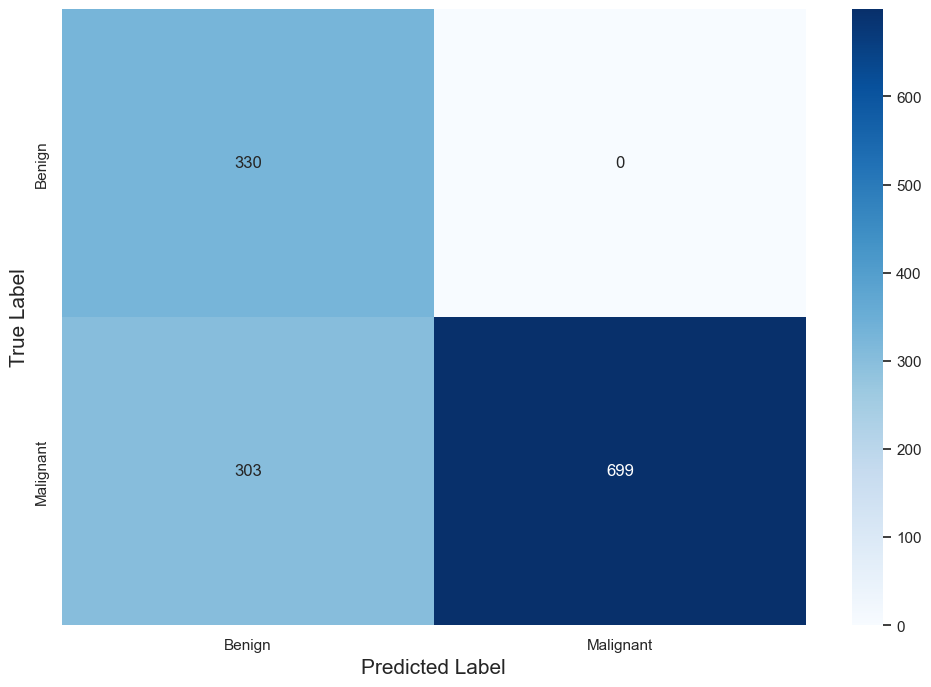

In [217]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(train_cm_heatmap, cmap="Blues", annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)


Text(117.24999999999999, 0.5, 'True Label')

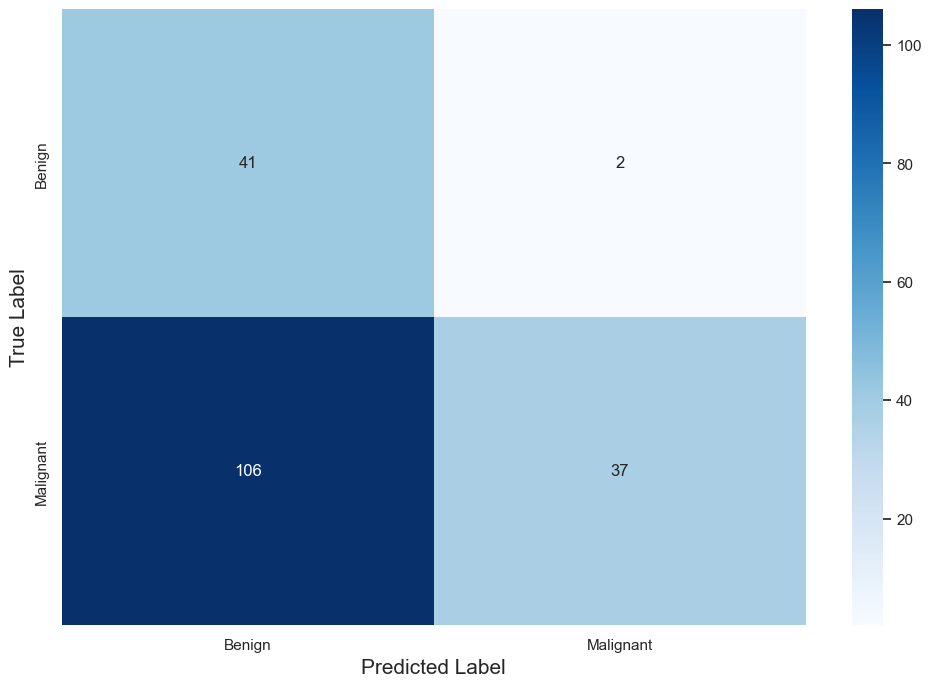

In [218]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(test_cm_heatmap, cmap="Blues", annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)

### Confusion Matrix heatmap (Subtype Classification)

In [224]:
import pandas as pd 
from sklearn.metrics import confusion_matrix
import seaborn as sns 

def get_pred(proba:np.ndarray): 
    pred = [] 
    for i in range(len(proba)): 
        pred.append(np.argmax(proba[i]).item())
    return pred

result = '/Users/wangheehwan/Desktop/kidney_radiomics/pipeline/result/subtype/0.1PC_xgboost_subtype_9368a2.json'
with open(result) as f:
    file = json.load(f)

mean_train_pred = get_pred(file['mean_train_proba'])
mean_test_pred = get_pred(file['mean_pred_proba'])

name = ['Oncocytoma', 'AML', 'chRCC', 'pRCC', 'ccRCC']

train_cm_heatmap = pd.DataFrame(confusion_matrix(file['train_y'], mean_train_pred))
train_cm_heatmap.columns = name 
train_cm_heatmap.index = name 
test_cm_heatmap = pd.DataFrame(confusion_matrix(file['test_y'], mean_test_pred))
test_cm_heatmap.columns = name 
test_cm_heatmap.index = name 


Text(117.24999999999999, 0.5, 'True Label')

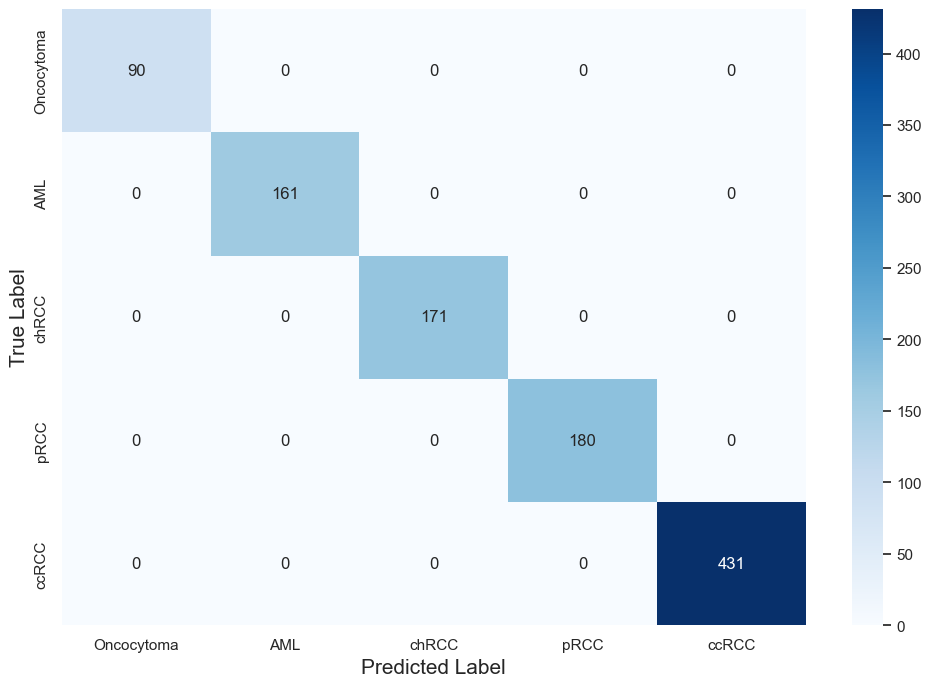

In [225]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(train_cm_heatmap, cmap="Blues", annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)


Text(117.24999999999999, 0.5, 'True Label')

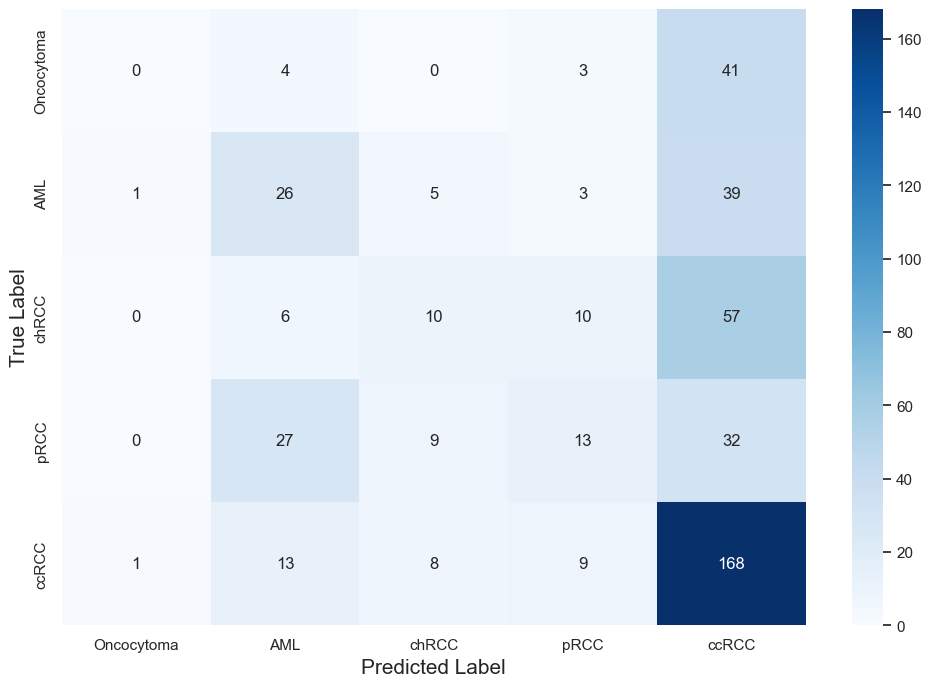

In [226]:
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(test_cm_heatmap, cmap="Blues", annot=True, fmt='d')
plt.xlabel("Predicted Label", fontsize=15)
plt.ylabel("True Label", fontsize=15)

## Difference of metric results according to probability threshold 

In [185]:
import json
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, multilabel_confusion_matrix,make_scorer, balanced_accuracy_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

def getting_prob_based_result(y, proba, threshold=0.8):
    pred_diff_threshold = (proba[:, 1] >= threshold).astype(int)
    tn, fp, fn, tp  = confusion_matrix(y, pred_diff_threshold).ravel()
    sensitivity = (tp / (tp + fn))
    specificity = (tn / (tn + fp))
    precision  = (tp / (tp + fp))
    npv = (tn / (tn + fn))
    return  sensitivity, specificity, precision, npv

In [204]:
result = '/Users/wangheehwan/Desktop/kidney_radiomics/pipeline/result/main/0.2PC_xgboost_c9f0a4.json'
with open(result) as f:
    file = json.load(f)

In [205]:
threshold_list = []
sensitivity_list = []
specificity_list = [] 
precision_list = [] 
npv_list = []


for i in range(1,100): 
    threshold = i / 100
    threshold_list.append(threshold)
    sensitivity, specificity, precision, npv = getting_prob_based_result(np.array(file['test_y']), np.array(file['mean_pred_proba']), threshold=threshold)
    sensitivity_list.append(sensitivity)
    specificity_list.append(specificity)
    precision_list.append(precision)
    npv_list.append(npv)




/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn))
/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn))
/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn))
/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn))
/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn))
/var/folders/_6/fts0bv3j7jjb0263g94q1lbw0000gn/T/ipykernel_81628/3278275664.py:16: RuntimeWarning: invalid value encountered in scalar divide
  npv = (tn / (tn + fn)

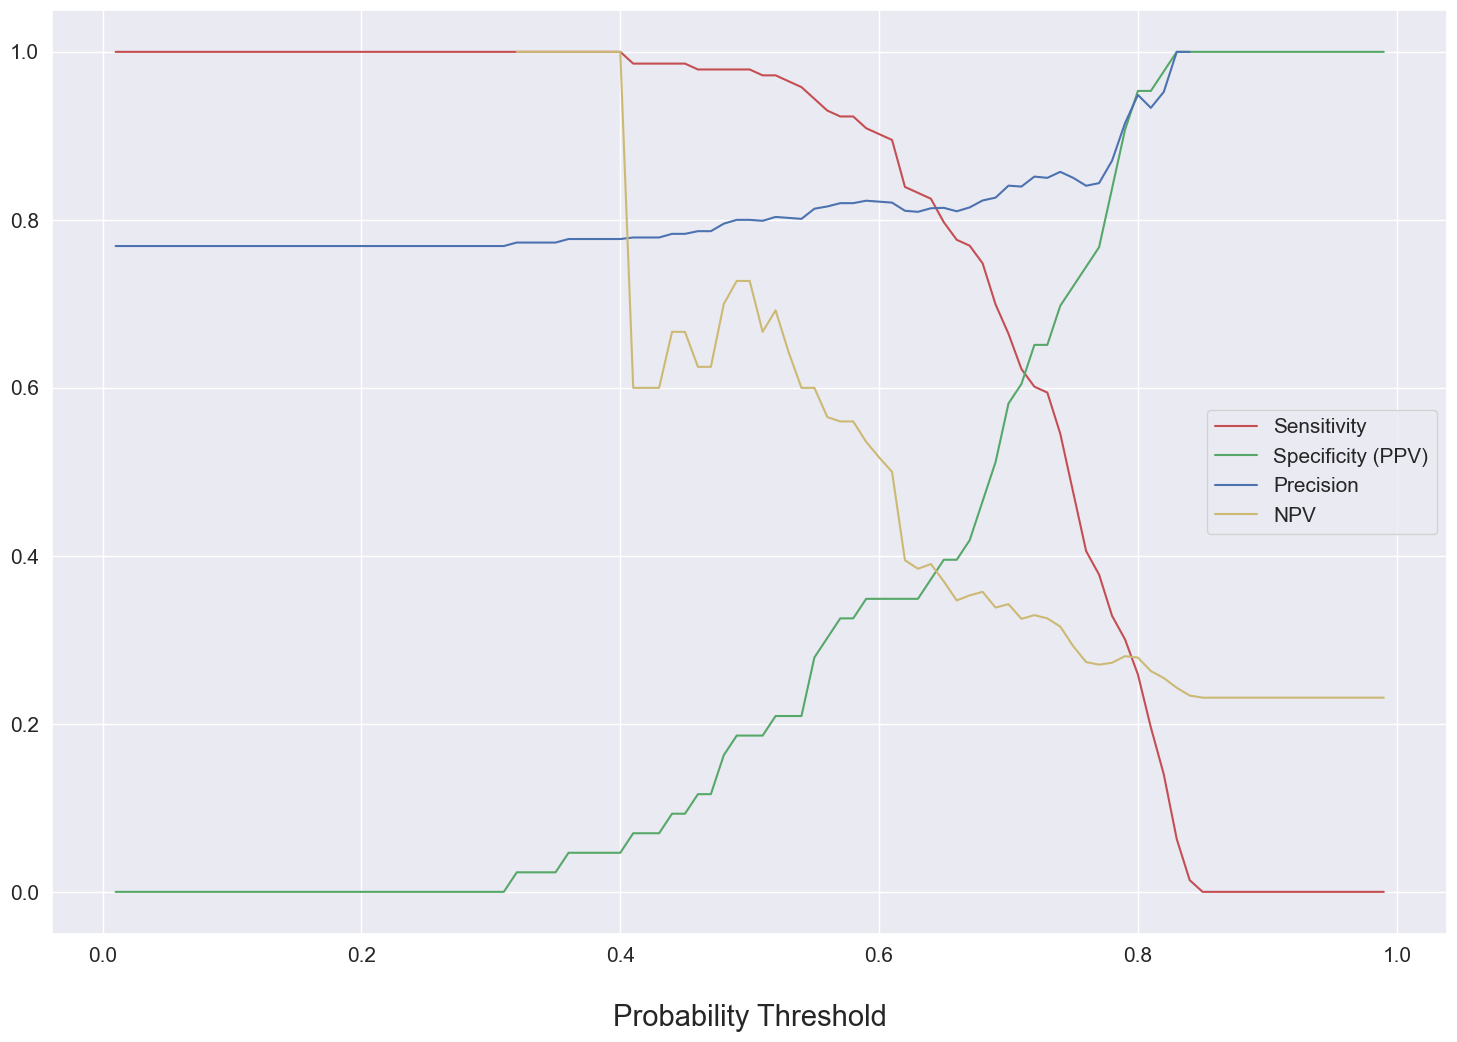

In [206]:
# basic setting 

plt.figure(figsize=(18, 12))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("\nProbability Threshold", fontsize=21)

# sensitivity
plt.plot(threshold_list, sensitivity_list, 'r-')

# specificity
plt.plot(threshold_list, specificity_list, 'g-')

# precision
plt.plot(threshold_list, precision_list, 'b-')

# NPV
plt.plot(threshold_list, npv_list, 'y-')

#plt.legend(['Linear SVM', 'Rbf SVM', 'XGBoost','Random Forest'])
plt.legend(['Sensitivity', 'Specificity (PPV)', 'Precision', 'NPV'], fontsize=15)